# PART3 パラメータをチューニングしてみよう

## おまじない

In [ ]:
!pip install category_encoders

In [90]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV


## データの読み込み
- train.csvとtest.csvとsubmit_sample.csvの３つのファイルを読み込みましょう
- それぞれを読み込んだものは変数はtrain, test, sampleに代入しましょう

In [91]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
sample = pd.read_csv('submit_sample.csv', header=None)

## trainから説明変数となるデータを取り出しましょう
- iloc[]を使います
- y以外を説明変数として取り出し、変数trainXに代入しましょう

In [92]:
trainX = train.iloc[:, 0:-1]
trainX

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
id,,,,,,,,,,,,,,,,
0,31,services,married,secondary,no,12294,yes,no,cellular,21,nov,101,3,498,0,other
1,29,entrepreneur,single,tertiary,no,43027,no,no,cellular,22,aug,158,2,702,0,unknown
2,35,management,married,tertiary,no,12252,yes,no,cellular,11,nov,351,1,826,0,failure
3,31,technician,married,secondary,no,99121,yes,yes,unknown,16,may,658,2,120,0,failure
4,48,unemployed,married,primary,no,42005,yes,no,telephone,3,apr,177,1,273,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,37,blue-collar,married,secondary,no,26661,yes,no,cellular,27,may,345,4,425,0,unknown
27096,35,services,married,secondary,no,42150,yes,no,cellular,27,may,121,1,719,0,unknown
27097,35,services,married,unknown,no,34531,no,no,cellular,28,jun,177,2,121,0,unknown


In [93]:
trainX.describe()

,age,balance,day,duration,campaign,pdays,previous
count,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000,27100.000000
mean,36.073284,47682.901771,16.747565,229.325387,1.775830,432.482399,0.085720
std,7.816417,31650.760036,8.569588,204.939958,0.950045,252.150648,0.365889
min,22.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,31.000000,20015.750000,8.000000,121.000000,1.000000,214.000000,0.000000
50%,33.000000,47624.000000,17.000000,158.000000,1.000000,432.000000,0.000000
75%,37.000000,75330.000000,26.000000,345.000000,2.000000,650.000000,0.000000
max,90.000000,102121.000000,31.000000,3076.000000,5.000000,870.000000,3.000000


In [94]:
len(trainX[trainX['balance'] < 0])

1758

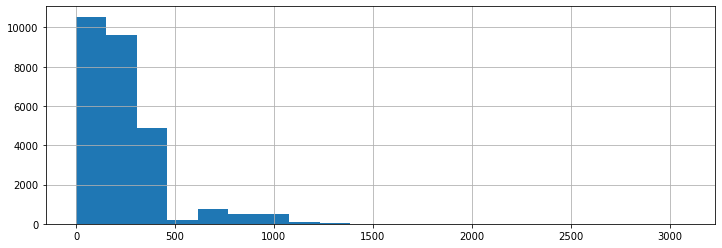

In [95]:
plt.figure(figsize=(12, 4))
trainX['duration'].hist(bins=20)

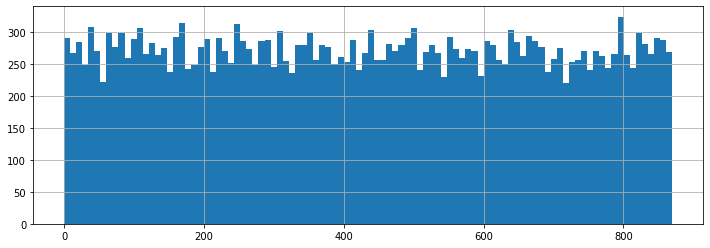

In [96]:
plt.figure(figsize=(12, 4))
trainX['pdays'].hist(bins=100)

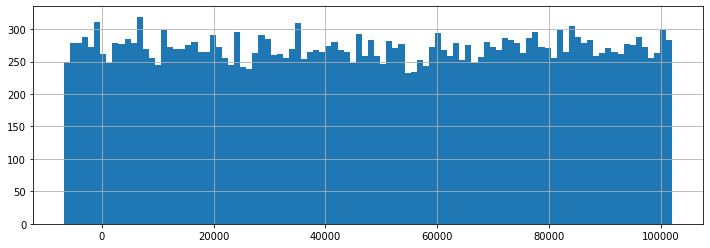

In [97]:
plt.figure(figsize=(12, 4))
trainX['balance'].hist(bins=100)

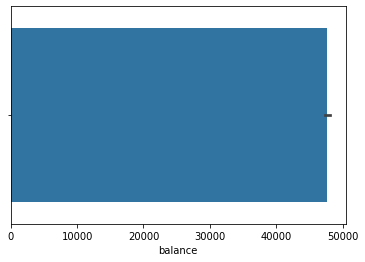

In [98]:
import seaborn as sns

sns.barplot(data=train, x='balance', hue='y')

## trainから目的変数となるデータを取り出しましょう
- yを選択し、変数yに代入しましょう

In [99]:
y = train['y']

## testから説明変数となるデータを取り出しましょう
- testの全てのカラムが説明変数となりますので、copy関数を使って変数testXに代入します

In [100]:
testX = test.copy()

In [101]:
age_bins = np.array([20, 30, 40, 50, 60, 100])
np.digitize(trainX['age'], age_bins)


array([2, 1, 2, ..., 2, 2, 2], dtype=int64)

## trainXとtestXをダミー変数化しましょう

In [102]:
cols_i = trainX.select_dtypes(exclude='object').columns.tolist()

In [103]:
cols_o = testX.select_dtypes(include='object').columns.tolist()
# cols_o.append('age_bining')

In [104]:
cols_o

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [105]:
# trainX = pd.get_dummies(trainX)
# testX = pd.get_dummies(testX)

In [106]:
pd.concat([trainX[cols_o], testX[cols_o]], axis=0).isnull().any()

job          False
marital      False
education    False
default      False
housing      False
loan         False
contact      False
month        False
poutcome     False
dtype: bool

In [107]:
import category_encoders as ce
ce_ohe = ce.OneHotEncoder(handle_unknown='impute')
ce_ohe.fit(pd.concat([trainX[cols_o], testX[cols_o]], axis=0))

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(pd.concat([trainX[cols_i], testX[cols_i]], axis=0))

# trainX_std = pd.DataFrame(scaler.transform(trainX[cols_i]))
# testX_std = pd.DataFrame(scaler.transform(testX[cols_i]))
# trainX_std.columns = cols_i
# testX_std.columns = cols_i


In [108]:
scaler.transform(trainX[cols_i])

array([[-0.64907676, -1.11401519,  0.49543591, ...,  1.29379156,
         0.25429016, -0.23730182],
       [-0.90433389, -0.14079829,  0.61212187, ...,  0.23889876,
         1.06430014, -0.23730182],
       [-0.1385625 , -1.1153452 , -0.67142367, ..., -0.81599404,
         1.55665915, -0.23730182],
       ...,
       [-0.1385625 , -0.40983974,  1.31223762, ...,  0.23889876,
        -1.24264006, -0.23730182],
       [-0.77670532,  1.65135467,  1.19555166, ..., -0.81599404,
        -1.32602344, -0.23730182],
       [-0.26619107, -1.22918748,  1.19555166, ...,  0.23889876,
        -0.44851262, -0.23730182]])

In [109]:
pd.concat([trainX[cols_o], testX[cols_o]], axis=0)

,job,marital,education,default,housing,loan,contact,month,poutcome
id,,,,,,,,,
0,services,married,secondary,no,yes,no,cellular,nov,other
1,entrepreneur,single,tertiary,no,no,no,cellular,aug,unknown
2,management,married,tertiary,no,yes,no,cellular,nov,failure
3,technician,married,secondary,no,yes,yes,unknown,may,failure
4,unemployed,married,primary,no,yes,no,telephone,apr,unknown
...,...,...,...,...,...,...,...,...,...
18045,self-employed,married,tertiary,no,yes,no,cellular,jul,failure
18046,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
18047,admin.,single,secondary,no,yes,no,unknown,may,unknown


In [110]:
trainX[cols_o]

,job,marital,education,default,housing,loan,contact,month,poutcome
id,,,,,,,,,
0,services,married,secondary,no,yes,no,cellular,nov,other
1,entrepreneur,single,tertiary,no,no,no,cellular,aug,unknown
2,management,married,tertiary,no,yes,no,cellular,nov,failure
3,technician,married,secondary,no,yes,yes,unknown,may,failure
4,unemployed,married,primary,no,yes,no,telephone,apr,unknown
...,...,...,...,...,...,...,...,...,...
27095,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
27096,services,married,secondary,no,yes,no,cellular,may,unknown
27097,services,married,unknown,no,no,no,cellular,jun,unknown


In [111]:
trainX_ = ce_ohe.transform(trainX[cols_o])
testX_ = ce_ohe.transform(testX[cols_o])

In [112]:
# trainX_['age_bins'] = np.digitize(trainX['age'], bins)
# testX_['age_bins'] = np.digitize(testX['age'], bins)


In [113]:
trainX_.shape

(27100, 43)

In [114]:
trainX_

,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,...,month_6,month_7,month_8,month_9,month_10,month_11,poutcome_1,poutcome_2,poutcome_3,poutcome_4
id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27096,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27097,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [115]:
cols_i

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [116]:
# trainX = pd.concat([trainX_std[['balance', 'duration', 'pdays']], trainX[['day', 'campaign', 'previous']], trainX_], axis=1)
# testX = pd.concat([testX_std[['balance', 'duration', 'pdays']], testX[['day', 'campaign', 'previous']], testX_], axis=1)

# trainX = pd.concat([trainX[['duration', 'campaign', 'previous']], trainX_], axis=1)
# testX = pd.concat([testX[['duration', 'campaign', 'previous']], testX_], axis=1)

# trainX = pd.concat([trainX[cols_i], trainX_], axis=1)
# testX = pd.concat([testX[cols_i], testX_], axis=1)

trainX = trainX_.copy()
testX = testX_.copy()


In [117]:
trainX

,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,...,month_6,month_7,month_8,month_9,month_10,month_11,poutcome_1,poutcome_2,poutcome_3,poutcome_4
id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27095,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27096,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27097,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


## 決定木モデルの箱を用意しましょう
- 変数名をclf1とし、DT()を代入しましょう
- パラメータは一旦、max_depth=2, min_samples_leaf=500としましょう

In [118]:
clf1 = DT(max_depth=2, min_samples_leaf=500)

## クロスバリデーションをしてclf1の精度を確かめてみましょう
- cross_validate関数を使います
- オプションには、clf1, trainX, y, cv=5, scoring="roc_auc",n_jobs=-1と書きます

In [119]:
cross_validate(clf1, trainX, y, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)

{'fit_time': array([0.03490472, 0.03889537, 0.03789115, 0.03390288, 0.03391004]),
 'score_time': array([0.00399017, 0.00398588, 0.00498652, 0.00398993, 0.00299025]),
 'test_score': array([0.68465799, 0.67854701, 0.69030456, 0.68429805, 0.69409684]),
 'train_score': array([0.68680795, 0.68831512, 0.68537763, 0.68687058, 0.68440439])}

## 異なるパラメータでもう一度決定木の箱を準備しましょう
- 変数はclf2としましょう
- パラメータはmax_depth=10, min_samples_leaf=500としましょう

In [120]:
clf2 = DT(max_depth=10, min_samples_leaf=500)

## クロスバリデーションをしてclf2の精度を確かめてみましょう

In [121]:
cross_validate(clf2, trainX, y, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)

{'fit_time': array([0.0708077 , 0.06385398, 0.05887294, 0.07479978, 0.07081103]),
 'score_time': array([0.00395942, 0.0059545 , 0.00595284, 0.00399065, 0.00398827]),
 'test_score': array([0.75687194, 0.74929332, 0.74615344, 0.75963308, 0.76392124]),
 'train_score': array([0.76531501, 0.76758316, 0.76794152, 0.76557238, 0.7649553 ])}

## 新たな決定木モデルの箱を準備しましょう
- 変数clf3とし、今回は特にパラメータはセットしません

In [122]:
clf3 = DT()

## グリッドサーチを試してみましょう
- パラメータの範囲を指定し、その範囲をしらみつぶしに調べることで、最適なパラメータを探索することをグリッドサーチといいます
- グリッドサーチ＋クロスバリデーションの組み合わせは良くパラメータ探索の方法として利用されます
- まず探索するパラメータの範囲を表す変数parametersを作ります
- この変数を作る時、"カギ"括弧ではなく、"波"括弧であることに注意して下さい
- {"パラメータの名前①":[範囲], "パラメータの名前②":[範囲]...}のように書きます
- 今回はmax_depthを2から10まで探索してみます

In [123]:
parameters = {"max_depth":[2,3,4,5,6,7,8,9,10]}

In [124]:
parameters = {"max_depth": list(range(2,11))}

In [125]:
parameters

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

## グリッドサーチ+クロスバリデーションで最適なパラメータを探してみましょう

- GridSearchCV関数を使います
- オプションとして、clf3, parameters, cv=5, scoring="roc_auc",n_jobs=-1と書きます
- グリッドサーチの結果は、変数gcvに代入しましょう
- その後、fit関数を使って、探索をしましょう

In [126]:
gcv = GridSearchCV(clf3, parameters, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv.fit(trainX, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
           

## グリッドサーチの結果を見てみましょう
- cv_____results_で結果を見る事が出来ます

In [127]:
gcv.cv_results_

{'mean_fit_time': array([0.04169083, 0.05405474, 0.06283178, 0.07300501, 0.09055743,
        0.09175458, 0.10531883, 0.11589112, 0.11330132]),
 'std_fit_time': array([0.00255836, 0.00410757, 0.00275025, 0.00951181, 0.01056211,
        0.01133608, 0.00737224, 0.00353377, 0.00726181]),
 'mean_score_time': array([0.00637999, 0.00598445, 0.00698123, 0.00558496, 0.00558534,
        0.00578418, 0.00558462, 0.00538554, 0.0053791 ]),
 'std_score_time': array([0.00148786, 0.00199573, 0.00399025, 0.00048881, 0.0007974 ,
        0.00182815, 0.00048825, 0.00048869, 0.00049368]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 9},
  {'max_depth': 10}],
 'split0_t

## cv_____results_の中で重要な２つをみてみましょう
- cv_____results_["mean_train_score"]とcv_____results_["mean_test_score"]です
- それぞれ変数train_scoreとtest_scoreに代入しましょう

In [128]:
train_score = gcv.cv_results_['mean_train_score']
test_score = gcv.cv_results_['mean_test_score']

In [129]:
train_score

array([0.69842531, 0.72373222, 0.74747094, 0.75979791, 0.77711956,
       0.7951487 , 0.80871856, 0.81964901, 0.83025183])

## train_scoreとtest_scoreを可視化しましょう
- x軸をmax_depth、y軸をaucとしてグラフを描きます
- 何も設定しないとx軸は0からスタートとなり、実際の値とずれてしまうので、調整が必要です
- 調整をする為には、plt.xticks([0,1],[2,3])のように書きます
- 上記のオプションの意味は何もしない時に0のものを2とし、1のものを3とする、という意味になります
- 今回はmax_depthを2～10まで調べたので9点あります

([<matplotlib.axis.XTick at 0x29d05181b48>,
 <a list of 9 Text xticklabel objects>)

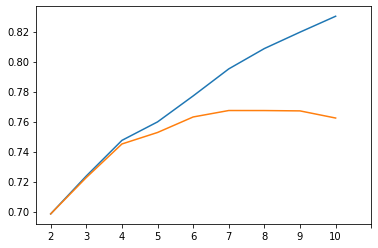

In [130]:
plt.plot(train_score)
plt.plot(test_score)
plt.xticks(list(range(0, 10)), list(range(2, 11)))

## グリッドサーチで選ばれたパラメータを確認しましょう
- best_____params_で結果を見ることができます

In [131]:
gcv.best_params_

{'max_depth': 7}

## testの予測しましょう
- gcvもpredict_proba関数を持っており、自動的に最適なパラメータを使ったモデルで予測がされます
- 予測結果はpredに代入しましょう。その後、1の確率のみを取り出して、再びpredに代入しましょう

In [132]:
testX

,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,...,month_6,month_7,month_8,month_9,month_10,month_11,poutcome_1,poutcome_2,poutcome_3,poutcome_4
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18045,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
18046,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18047,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [133]:
pred = gcv.predict_proba(testX)

In [134]:
pred = pred[:,1]

## predをsample[1]に代入してファイル出力し、DeepAnalyticsへ投稿しましょう
- ファイル名は「submit3_bank.csv」としましょう
- index=None,header=Noneのオプションを忘れないように書きだしましょう

In [135]:
sample[1] = pred
sample.to_csv('submit3_bank.csv', index=None, header=None)

# 実習

1.新たな決定木モデルの箱を変数clf4として準備してみよう。パラメータの設定は不要です

In [136]:
clf4 = DT()

2.max_depthとmin_samples_leafの値の範囲を指定した変数parameters2を作ろう
- max_depthは2～10まで、min_samples_leafは[5,10,20,50,100,500]にしましょう

In [137]:
parameters2 = {
    "max_depth": list(range(2,11)),
    "min_samples_leaf": [5,10,20,50,100,500],
    "random_state": [0]
}

3.グリッドサーチ+クロスバリデーションで最適なパラメータを探そう。グリッドサーチの結果は変数gcv2に代入しよう

In [138]:
gcv2 = GridSearchCV(clf4, parameters2, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv2.fit(trainX, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
            

4.最適なパラメータはなんだったか確かめてみよう

In [139]:
gcv2.best_params_

{'max_depth': 10, 'min_samples_leaf': 20, 'random_state': 0}

5.testの予測をし、予測結果のうち、１となる確率のみを変数pred2に代入しよう

In [140]:
pred2 = gcv2.predict_proba(testX)

In [141]:
pred2 = pred2[:,1]

6.pred2をsample[1]に代入して"submit4_bank.csv"としてファイル出力し、DeepAnalyticsへ投稿しよう

In [142]:
sample[1] = pred2
sample.to_csv('submit4_bank.csv', index=None, header=None)

In [143]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, gcv2.predict_proba(trainX)[:,1])
# 0.8294283339336216

0.8189618232660768

## LightGBM

In [144]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()

gcv3 = GridSearchCV(lgb, parameters2, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv3.fit(trainX, y)


GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'mi

In [145]:
gcv3.best_params_

{'max_depth': 3, 'min_samples_leaf': 5, 'random_state': 0}

In [146]:
pred3 = gcv3.predict_proba(testX)

In [147]:
pred3 = pred3[:,1]

In [148]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, gcv3.predict_proba(trainX)[:,1])
# 0.9113408811229391


0.8266849811394317

In [149]:
sample[1] = pred3
sample.to_csv('submit5_bank.csv', index=None, header=None)

In [150]:
parameters2

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_samples_leaf': [5, 10, 20, 50, 100, 500],
 'random_state': [0]}

## XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

gcv4 = GridSearchCV(xgb, parameters2, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv4.fit(trainX, y)


In [ ]:
gcv4.best_params_

In [ ]:
pred4 = gcv4.predict_proba(testX)

In [ ]:
pred4 = pred4[:,1]

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, gcv4.predict_proba(trainX)[:,1])
# 0.8971628825017827
